In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from wordcloud import WordCloud

In [2]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
#for model-building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
val_df=pd.read_csv("val.csv")
val_df.dropna(inplace = True)
#Adding headers to the data columns
val_df.columns = ['text','target']
val_df.head()

,text,target
0,"wong kar-wei's "" fallen angels "" is , on a pur...",1
1,there is nothing like american history x in th...,1
2,"an unhappy italian housewife , a lonely waiter...",1
3,"when people are talking about good old times ,...",1
4,the rocky horror picture show 'special edition...,1


In [4]:
train_df=pd.read_csv("train.csv")
train_df.dropna(inplace = True)

#Adding headers to the data columns
train_df.columns = ['text','target']
train_df.head()


,text,target
0,note : some may consider portions of the follo...,1
1,every once in a while you see a film that is s...,1
2,"when i was growing up in 1970s , boys in my sc...",1
3,"the muppet movie is the first , and the best m...",1
4,do film critics have morals ? are there any u...,1


In [5]:
test_df=pd.read_csv("test.csv")
test_df.dropna(inplace = True)
#Adding headers to the data columns
test_df.columns = ['text','target']
test_df.head()

,text,target
0,"i know it already opened in december , but i f...",1
1,"what's shocking about "" carlito's way "" is how...",1
2,uncompromising french director robert bresson'...,1
3,"aggressive , bleak , and unrelenting film abou...",1
4,touchstone pictures and spyglass entertainment...,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1399 non-null   object
 1   target  1399 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    399 non-null    object
 1   target  399 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [8]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    199 non-null    object
 1   target  199 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,1399.0,0.499643,0.500179,0.0,0.0,0.0,1.0,1.0


In [10]:
train_df.isna().sum()  #Missing values

text      0
target    0
dtype: int64

In [11]:
#checking for number of unique values
train_df.nunique()

text      1399
target       2
dtype: int64

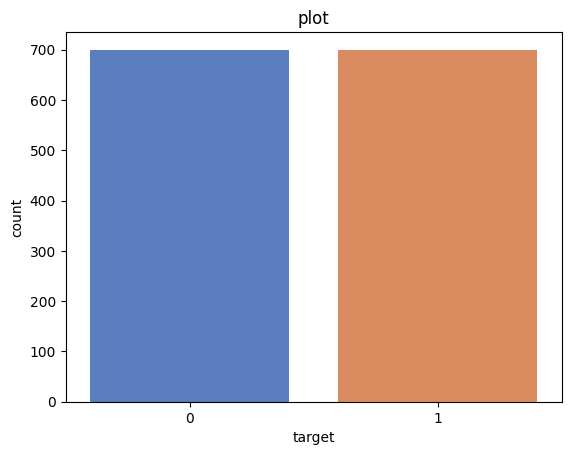

In [12]:
sns.countplot(x = 'target',  data = train_df, palette = 'muted')
plt.title('plot')
plt.show()

In [13]:
# WORD-COUNT
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))
print(train_df[train_df['target']==1]['word_count'].mean()) #Disaster tweets
print(train_df[train_df['target']==0]['word_count'].mean()) 

788.2904148783977
714.1228571428571


In [14]:
#CHARACTER-COUNT
train_df['char_count'] = train_df['text'].apply(lambda x: len(str(x)))
print(train_df[train_df['target']==1]['char_count'].mean()) #Disaster tweets
print(train_df[train_df['target']==0]['char_count'].mean()) #Non-Disaster tweets

4132.080114449213
3708.9185714285713


In [15]:
#UNIQUE WORD-COUNT
train_df['unique_word_count'] = train_df['text'].apply(lambda x: len(set(str(x).split())))
print(train_df[train_df['target']==1]['unique_word_count'].mean()) #Disaster tweets
print(train_df[train_df['target']==0]['unique_word_count'].mean()) #Non-Disaster tweets

358.6852646638054
336.66857142857145


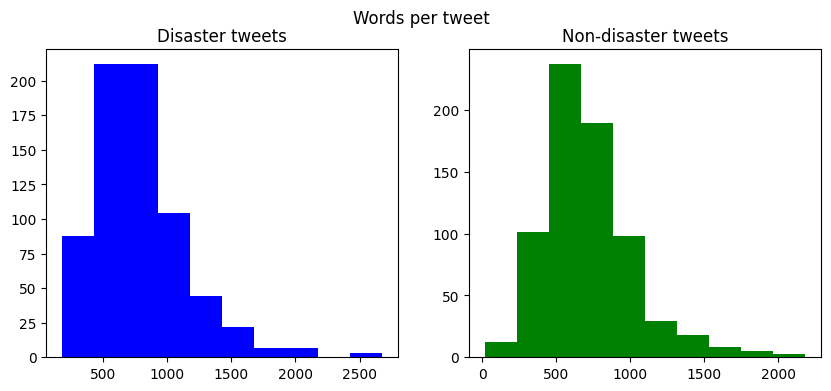

In [17]:
#Plotting word-count per tweet
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
train_words = train_df[train_df['target']==1]['word_count']

ax1.hist(train_words,color='b')
ax1.set_title('Disaster tweets')

train_words= train_df[train_df['target']==0]['word_count']

ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()

In [18]:
#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

In [19]:
#STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [20]:
#Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

In [21]:
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [22]:
#Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [23]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

train_df['clean_text'] = train_df['text'].apply(lambda x: finalpreprocess(x))

train_df.head()

,text,target,word_count,char_count,unique_word_count,clean_text
0,note : some may consider portions of the follo...,1,1079,6171,547,note may consider portion follow text spoiler ...
1,every once in a while you see a film that is s...,1,851,4278,374,every see film effective deliver good easy for...
2,"when i was growing up in 1970s , boys in my sc...",1,840,4524,393,grow boys school use divide two group base act...
3,"the muppet movie is the first , and the best m...",1,462,2379,211,muppet movie first best movie among ever grow ...
4,do film critics have morals ? are there any u...,1,1578,8128,599,film critic moral unwritten law ethical movie ...


In [24]:
test_df['clean_text'] = test_df['text'].apply(lambda x: finalpreprocess(x))

test_df.head()

,text,target,clean_text
0,"i know it already opened in december , but i f...",1,know already open december finally get around ...
1,"what's shocking about "" carlito's way "" is how...",1,shock carlito way good gotten bit bad rap big ...
2,uncompromising french director robert bresson'...,1,uncompromising french director robert bresson ...
3,"aggressive , bleak , and unrelenting film abou...",1,aggressive bleak unrelenting film interracial ...
4,touchstone pictures and spyglass entertainment...,1,touchstone picture spyglass entertainment pres...


In [25]:
val_df['clean_text'] = val_df['text'].apply(lambda x: finalpreprocess(x))

val_df.head()

,text,target,clean_text
0,"wong kar-wei's "" fallen angels "" is , on a pur...",1,wong kar wei fall angel purely visceral level ...
1,there is nothing like american history x in th...,1,nothing like american history x theater video ...
2,"an unhappy italian housewife , a lonely waiter...",1,unhappy italian housewife lonely waiter goofy ...
3,"when people are talking about good old times ,...",1,people talk good old time actually want make b...
4,the rocky horror picture show 'special edition...,1,rocky horror picture show special edition star...


1. Choose and implement a text representation technique (such as bag of words, word embeddings etc.). Justify your choice.

In [29]:
x= train_df.clean_text
y =train_df.target

In [30]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state =26105111)

In [31]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [32]:
bag_of_words = vect.transform(X_train)
print(bag_of_words)
print('{} Number of texts has {} words'.format(bag_of_words.shape[0], bag_of_words.shape[1]))

  (0, 204)	1
  (0, 227)	1
  (0, 327)	1
  (0, 337)	1
  (0, 339)	1
  (0, 425)	2
  (0, 626)	1
  (0, 630)	2
  (0, 641)	1
  (0, 652)	1
  (0, 1044)	1
  (0, 1268)	1
  (0, 1391)	1
  (0, 1461)	2
  (0, 1623)	1
  (0, 1755)	2
  (0, 1871)	2
  (0, 1872)	1
  (0, 1894)	1
  (0, 1962)	1
  (0, 2009)	1
  (0, 2135)	2
  (0, 2329)	5
  (0, 2588)	1
  (0, 2607)	1
  :	:
  (1328, 23811)	1
  (1328, 23946)	1
  (1328, 23953)	1
  (1328, 23958)	1
  (1328, 24021)	1
  (1328, 24179)	1
  (1328, 24288)	1
  (1328, 24396)	2
  (1328, 24431)	1
  (1328, 24487)	1
  (1328, 24812)	1
  (1328, 24827)	1
  (1328, 24835)	1
  (1328, 24849)	1
  (1328, 25088)	1
  (1328, 25383)	1
  (1328, 26180)	1
  (1328, 26318)	1
  (1328, 26460)	1
  (1328, 26559)	1
  (1328, 26759)	2
  (1328, 26760)	1
  (1328, 26865)	1
  (1328, 26967)	2
  (1328, 27180)	4
1329 Number of texts has 27321 words


In [39]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer( min_df=5, encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(train_df["clean_text"])
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:20])


['aaron' 'abandon' 'abby' 'ability' 'ability make' 'able' 'able create'
 'able make' 'ably' 'aboard' 'abortion' 'abound' 'abraham' 'abrasive'
 'abrupt' 'abruptly' 'absence' 'absent' 'absolute' 'absolutely']


Using the text representation from (1), build a machine learning model for text classification
(e.g. decision tree, neural network etc.). Justify your choice

In [34]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Model Building

In [42]:
x= count_train
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state =26105111)

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        38
           1       0.88      0.72      0.79        32

    accuracy                           0.83        70
   macro avg       0.84      0.82      0.82        70
weighted avg       0.84      0.83      0.83        70



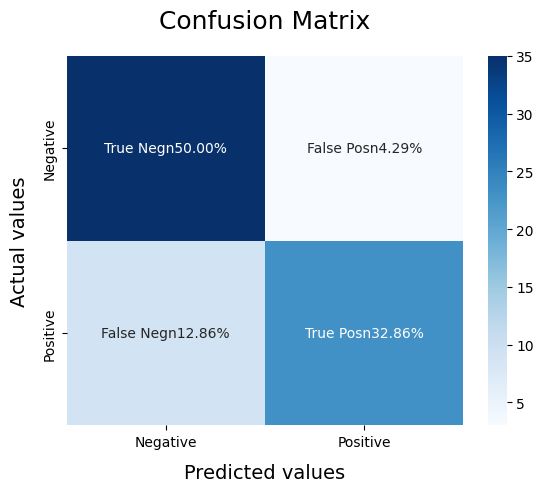

In [43]:

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

Evaluate your model using appropriate metrics of your choice.

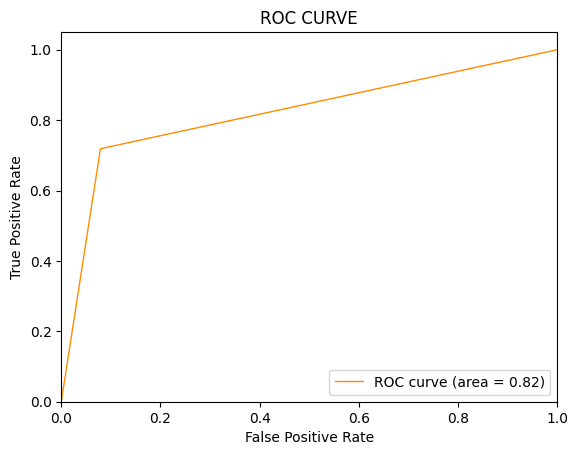

In [44]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()